# जेनेटिक एल्गोरिथमहरू

यो नोटबुक [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners) को भाग हो।


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## केही सिद्धान्त

**जेनेटिक एल्गोरिदमहरू** (GA) कृत्रिम बुद्धिमत्ताको **विकासवादी दृष्टिकोण**मा आधारित छन्, जसमा जनसंख्याको विकासको विधिहरू प्रयोग गरेर कुनै समस्या समाधानको लागि उत्तम समाधान प्राप्त गरिन्छ। यी एल्गोरिदमहरू 1975 मा [जोन हेनरी हल्याण्ड](https://en.wikipedia.org/wiki/John_Henry_Holland) द्वारा प्रस्तावित गरिएका थिए।

जेनेटिक एल्गोरिदमहरू निम्न विचारहरूमा आधारित छन्:
* समस्याका वैध समाधानहरूलाई **जीनहरू**को रूपमा प्रतिनिधित्व गर्न सकिन्छ।
* **क्रसओभर**ले दुई समाधानलाई संयोजन गरेर नयाँ वैध समाधान प्राप्त गर्न मद्दत गर्दछ।
* **चयन**ले केही **फिटनेस फङ्सन** प्रयोग गरेर थप उपयुक्त समाधानहरू चयन गर्न प्रयोग गरिन्छ।
* **म्युटेसनहरू**लाई अनुकूलनलाई अस्थिर बनाउन र स्थानीय न्यूनतमबाट बाहिर निकाल्न परिचय गराइन्छ।

यदि तपाईंले जेनेटिक एल्गोरिदम कार्यान्वयन गर्न चाहनुहुन्छ भने, तपाईंलाई निम्न कुराहरू आवश्यक पर्छ:

 * हाम्रो समस्याका समाधानहरूलाई **जीनहरू** $g\in\Gamma$ प्रयोग गरेर कोड गर्ने विधि पत्ता लगाउनुहोस्।
 * जीनहरूको सेट $\Gamma$ मा **फिटनेस फङ्सन** $\mathrm{fit}: \Gamma\to\mathbb{R}$ परिभाषित गर्नुहोस्। साना फङ्सन मानहरूले राम्रो समाधानहरूलाई जनाउँछन्।
 * दुई जीनहरूलाई संयोजन गरेर नयाँ वैध समाधान प्राप्त गर्न **क्रसओभर** मेकानिज्म परिभाषित गर्नुहोस् $\mathrm{crossover}: \Gamma^2\to\Gamma$।
 * **म्युटेसन** मेकानिज्म परिभाषित गर्नुहोस् $\mathrm{mutate}: \Gamma\to\Gamma$।
धेरै अवस्थामा, क्रसओभर र म्युटेसन जीनहरूलाई संख्यात्मक अनुक्रम वा बिट भेक्टरको रूपमा हेरफेर गर्न सरल एल्गोरिदमहरू हुन्।

जेनेटिक एल्गोरिदमको विशिष्ट कार्यान्वयन केस अनुसार फरक हुन सक्छ, तर समग्र संरचना निम्नानुसार हुन्छ:

1. प्रारम्भिक जनसंख्या चयन गर्नुहोस् $G\subset\Gamma$
2. यस चरणमा प्रदर्शन गरिने अपरेसन (क्रसओभर वा म्युटेसन) मध्ये एकलाई अनियमित रूपमा चयन गर्नुहोस्।
3. **क्रसओभर**:
  * अनियमित रूपमा दुई जीनहरू चयन गर्नुहोस् $g_1, g_2 \in G$
  * क्रसओभर गणना गर्नुहोस् $g=\mathrm{crossover}(g_1,g_2)$
  * यदि $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ वा $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ भने - जनसंख्यामा सम्बन्धित जीनलाई $g$ द्वारा प्रतिस्थापन गर्नुहोस्।
4. **म्युटेसन** - अनियमित रूपमा जीन $g\in G$ चयन गर्नुहोस् र यसलाई $\mathrm{mutate}(g)$ द्वारा प्रतिस्थापन गर्नुहोस्।
5. चरण 2 बाट दोहोर्याउनुहोस्, जबसम्म हामी $\mathrm{fit}$ को पर्याप्त सानो मान प्राप्त गर्दैनौं, वा चरणहरूको सीमामा पुग्दैनौं।

GA द्वारा सामान्यतया समाधान गरिने कार्यहरू:
1. तालिका अनुकूलन
1. उत्तम प्याकिङ
1. उत्तम काट्ने तरिका
1. थकाउने खोजलाई तीव्र बनाउने


## समस्या १: निष्पक्ष खजाना बाँडफाँड

**कार्य**:  
दुई व्यक्तिले विभिन्न आकार (र, तदनुसार, फरक मूल्य) भएका हिराहरू भएको खजाना फेला पारेका छन्। उनीहरूले खजानालाई दुई भागमा यसरी बाँड्नुपर्छ कि मूल्यको भिन्नता ० (वा न्यूनतम) होस्।

**औपचारिक परिभाषा**:  
हामीसँग संख्याहरूको एउटा सेट $S$ छ। यसलाई दुई उपसेट $S_1$ र $S_2$ मा यसरी बाँड्नुपर्छ कि  
$$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$  
र $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$।

सबभन्दा पहिले, सेट $S$ परिभाषित गरौं:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

समस्याको प्रत्येक सम्भावित समाधानलाई द्विआधारी भेक्टर $B\in\{0,1\}^N$ द्वारा एन्कोड गरौं, जहाँ $i$-औं स्थानमा रहेको संख्या मूल सेट $S$ मा रहेको $i$-औं संख्या कुन सेट ($S_1$ वा $S_2$) मा पर्छ भन्ने देखाउँछ। `generate` फङ्सनले ती र्यान्डम द्विआधारी भेक्टरहरू उत्पन्न गर्नेछ।


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


अब `fit` फङ्सनलाई परिभाषित गरौं जसले समाधानको "खर्च" गणना गर्दछ। यो दुई सेटहरू, $S_1$ र $S_2$ को योगको बीचको अन्तर हुनेछ:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

अब हामीले म्युटेसन र क्रसओभरका लागि फङ्सनहरू परिभाषित गर्नुपर्छ:
* म्युटेसनका लागि, हामी एउटा र्यान्डम बिट चयन गर्नेछौं र त्यसलाई उल्ट्याउनेछौं (० लाई १ मा परिवर्तन गर्ने र १ लाई ० मा परिवर्तन गर्ने)  
* क्रसओभरका लागि, हामी केही बिटहरू एउटा भेक्टरबाट लिनेछौं, र केही बिटहरू अर्को भेक्टरबाट लिनेछौं। हामी `generate` फङ्सनलाई प्रयोग गर्नेछौं, जसले र्यान्डम रूपमा निर्णय गर्नेछ कि कुन इनपुट मास्कबाट कुन बिटहरू लिने।  


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

अब, मुख्य कार्यले विकास प्रक्रिया सञ्चालन गर्दछ। `n` भनेको विकासको चरणहरूको संख्या हो। प्रत्येक चरणमा:
* ३०% सम्भावनाको साथ, हामी एक म्युटेशन गर्छौं, र सबैभन्दा खराब `fit` फङ्सन भएको तत्वलाई म्युटेट गरिएको तत्वले प्रतिस्थापन गर्छौं।
* ७०% सम्भावनाको साथ, हामी क्रसओभर गर्छौं।

यो कार्यले सबैभन्दा राम्रो समाधान (सबैभन्दा राम्रो समाधानसँग सम्बन्धित जीन) र प्रत्येक पुनरावृत्तिमा जनसंख्याको न्यूनतम फिट फङ्सनको इतिहास फर्काउँछ।


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


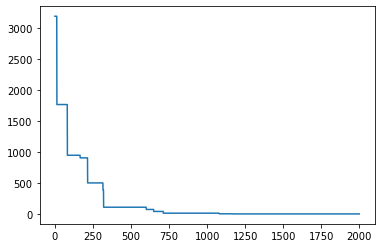

In [10]:
plt.plot(hist)
plt.show()

## समस्या २: एन क्विन्स समस्या

**कार्य**:  
तपाईंले $N$ क्विन्सलाई $N\times N$ आकारको चेस बोर्डमा यसरी राख्नुपर्छ कि तिनीहरूले एक-अर्कालाई आक्रमण नगर्न सकून्।

सबभन्दा पहिले, यो समस्या जेनेटिक एल्गोरिदम बिना, पूर्ण खोज प्रयोग गरेर समाधान गरौं। हामी बोर्डको अवस्थालाई सूची $L$ द्वारा प्रतिनिधित्व गर्न सक्छौं, जहाँ सूचीको $i$-औं संख्या $i$-औं पङ्क्तिमा क्विनको तेर्सो स्थान हो। यो स्पष्ट छ कि प्रत्येक समाधानमा प्रत्येक पङ्क्तिमा केवल एक क्विन हुनेछ, र प्रत्येक पङ्क्तिमा एक क्विन हुनेछ।

हाम्रो लक्ष्य भनेको समस्याको पहिलो समाधान फेला पार्नु हो, त्यसपछि खोजी रोक्नेछौं। तपाईं सजिलै यो कार्यलाई सबै सम्भावित क्विनहरूको स्थानहरू उत्पन्न गर्न विस्तार गर्न सक्नुहुन्छ।


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

अब २०-रानी समस्याको समाधान पाउन कति समय लाग्छ भनेर मापन गरौं:


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


अब हामी यो समस्या समाधान गर्नको लागि जेनेटिक एल्गोरिदम प्रयोग गर्नेछौं। यो समाधान [यो ब्लग पोस्ट](https://kushalvyas.github.io/gen_8Q.html) बाट प्रेरित छ।

हामी प्रत्येक समाधानलाई $N$ लम्बाइको एउटै सूचीद्वारा प्रतिनिधित्व गर्नेछौं, र `fit` फंक्शनको रूपमा हामी ती रानीहरूको संख्या लिनेछौं जसले एकअर्कालाई आक्रमण गर्छन्:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

अब मुख्य विकासात्मक लूप परिभाषित गरौं। हामी यस पटकको उदाहरणभन्दा फरक तरिकाले तर्कलाई अलि फरक बनाउनेछौं, ताकि कसरी सिर्जनात्मक हुन सकिन्छ भन्ने देखाउन सकियोस्। हामी लूपलाई तबसम्म चलाउनेछौं जबसम्म हामीले उत्तम समाधान (fitness function=0) प्राप्त गर्दैनौं, र प्रत्येक चरणमा हामी हालको पुस्तालाई लिनेछौं र उस्तै आकारको नयाँ पुस्ता उत्पादन गर्नेछौं। यो `nxgeneration` function प्रयोग गरेर गरिन्छ, निम्न चरणहरूको माध्यमबाट:

1. सबैभन्दा अनुपयुक्त समाधानहरू हटाउनुहोस् - यसका लागि `discard_unfit` function प्रयोग गरिन्छ
1. पुस्तामा केही थप अनियमित समाधानहरू थप्नुहोस्
1. `gen_size` को आकारको नयाँ पुस्ता निम्न चरणहरूको माध्यमबाट प्रत्येक नयाँ जीनको लागि तयार गर्नुहोस्:
    - दुई अनियमित जीनहरू चयन गर्नुहोस्, जसको सम्भावना fitness function को अनुपातमा हुन्छ
    - एक crossover गणना गर्नुहोस्
    - `mutation_prob` को सम्भावनासँग mutation लागू गर्नुहोस्


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**अस्वीकरण**:  
यो दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) प्रयोग गरेर अनुवाद गरिएको छ। हामी यथार्थताको लागि प्रयास गर्छौं, तर कृपया ध्यान दिनुहोस् कि स्वचालित अनुवादमा त्रुटिहरू वा अशुद्धताहरू हुन सक्छ। यसको मूल भाषामा रहेको मूल दस्तावेज़लाई आधिकारिक स्रोत मानिनुपर्छ। महत्वपूर्ण जानकारीको लागि, व्यावसायिक मानव अनुवाद सिफारिस गरिन्छ। यस अनुवादको प्रयोगबाट उत्पन्न हुने कुनै पनि गलतफहमी वा गलत व्याख्याको लागि हामी जिम्मेवार हुने छैनौं।
